In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
import fastai

In [4]:
fastai.__version__

'1.0.61'

In [5]:
root_dir = "/content/drive/MyDrive/Colab Notebooks/ops"
base_dir = Path(root_dir)/'fastai-data/mnist'


In [6]:
path = untar_data(URLs.MNIST_SAMPLE, None, base_dir/'data')

In [7]:
tfms = get_transforms(do_flip=False)

In [8]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, bs=32)

In [9]:
data.classes

['3', '7']

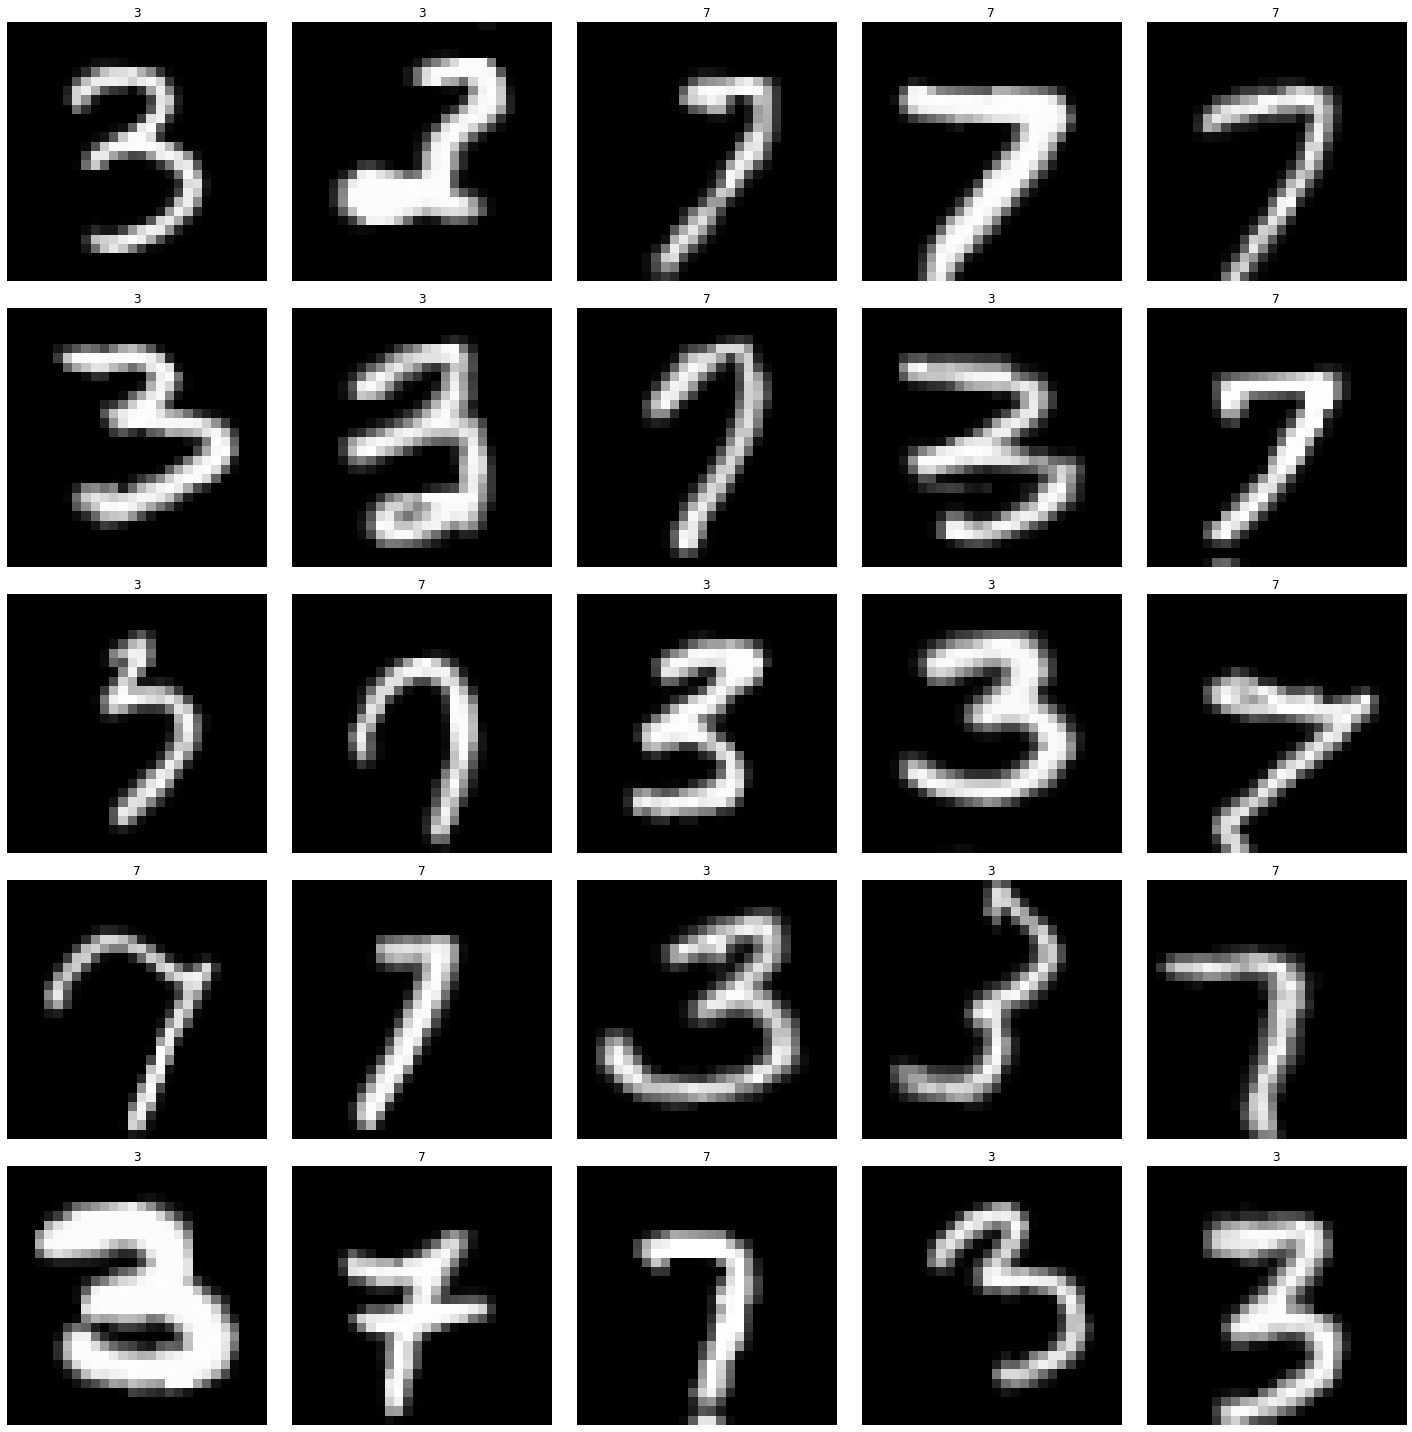

In [10]:
data.show_batch()

In [11]:
metrics=[accuracy,Precision(),Recall()]

In [12]:
cbs = [ 
       partial(EarlyStoppingCallback, monitor='accuracy', min_delta=0.01, patience=3),
       ]

In [13]:
learn = cnn_learner(data, base_arch=models.mobilenet_v2, metrics=metrics, model_dir=base_dir/'models', callback_fns=cbs)


In [14]:
train_cbs= [SaveModelCallback(learn, every='improvement', monitor='accuracy', name='best'),
            ReduceLROnPlateauCallback(learn),
            ShowGraph(learn),
]

epoch,train_loss,valid_loss,accuracy,precision,recall,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
CPU times: user 6.54 s, sys: 910 ms, total: 7.45 s
Wall time: 21.5 s


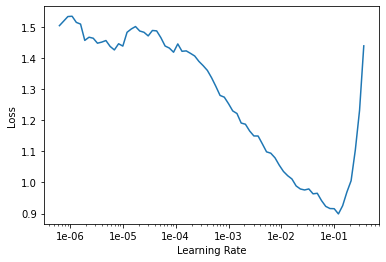

In [15]:
%%time
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,0.634710,0.519923,0.819431,0.998489,0.642996,01:18
1,0.089002,0.040707,0.990677,0.987440,0.994163,01:14


Better model found at epoch 0 with accuracy value: 0.8194308280944824.


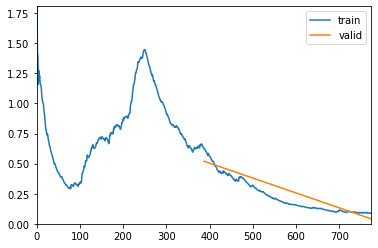

Better model found at epoch 1 with accuracy value: 0.9906771183013916.


In [16]:
# learn.fit_one_cycle(cyc_len=5)
learn.fit_one_cycle(2,max_lr=1e-1, callbacks=train_cbs)

we can do a lot more things while doing transfer learning using fastai version 2/new version, wanted to use it but google colab doesn't have it, installing it on colab is a pain

In [22]:
(base_dir/'models').ls()

[PosixPath('/content/drive/MyDrive/Colab Notebooks/ops/fastai-data/mnist/models/best.pth'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/ops/fastai-data/mnist/models/arch.pth'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/ops/fastai-data/mnist/models/tmp.pth'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/ops/fastai-data/mnist/models/save.pth'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/ops/fastai-data/mnist/models/export.pkl')]

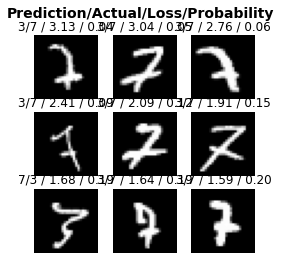

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(4,4))

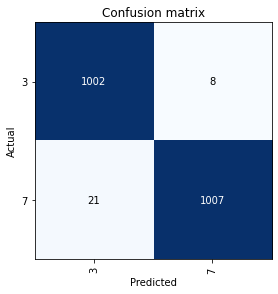

In [20]:
interp.plot_confusion_matrix()

In [21]:
learn.export(base_dir/'models'/'export.pkl')

In [18]:
learn.save('save',True)

PosixPath('/content/drive/MyDrive/Colab Notebooks/ops/fastai-data/mnist/models/save.pth')

In [33]:
torch.save(learn.model,base_dir/'models'/'arch.pth')

# INFERENCE

In [39]:
import torch, cv2
import numpy as np
from PIL import Image as PImage
from fastai.vision import *

In [24]:
load_learn = load_learner(base_dir/'models')

In [28]:
img = cv2.imread(root_dir+'/3.jpg')

In [40]:
pil_im = PImage.fromarray(img) 

x = pil2tensor(pil_im ,np.float32)


In [42]:
preds_num = load_learn.predict(Image(x))[2]

In [46]:
idx = preds_num.argmax().item()

In [47]:
['3', '7'][idx]

'3'